In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
iris.target_names
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target']=iris.target #adding target column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df[df['target']==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [5]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [6]:
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df[45:51]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor


In [8]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

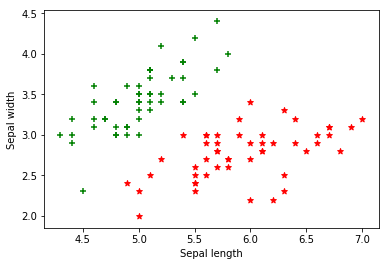

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
#sepal length vs sepal width (setosa vs versicolor)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='g', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='r', marker='*' )
#model is not good to go with as the classification will not be good over the data points that closely attached so it is good to go for training.



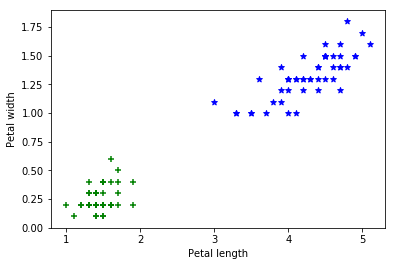

In [10]:
#petal lenght vs petal width ( setosa vs versicolor)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='g', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='b', marker='*')

#here classification will be best as the data points is very far than the sepal graph

In [11]:
#now its a training phase using svm only
#for this import train_test_split and model name
from sklearn.model_selection import train_test_split
#now drop the column for the target
df['target']=iris.target 
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])
X=df.drop(['target','flower_names'], axis='columns' )
y=df.target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
model.score(X_test, y_test)

1.0

In [13]:
#Now its time to use tuning parameters, i.e, gamma,regularization(c) and kernel
model_c=SVC(C=1)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [14]:
model_g=SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [15]:
model_k=SVC(kernel='linear')
model_k.fit(X_train, y_train)
model_k.score(X_test,y_test)

0.9666666666666667

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=2)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
model.score(X_test,y_test)

0.9666666666666667